<a href="https://colab.research.google.com/github/Jayand97/DSA-Assignment/blob/main/Mainproject_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataset/fraudtransaction.csv')
data.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.0,9291619.62,1,0
1,1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.0,132842.64,1,0
2,4440,4,TRANSFER,10000000.00,C7162498,12900000.00,2930418.44,C945327594,0.0,0.00,1,0
3,14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.0,184477.77,1,0
4,25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.0,970749.68,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1048575 non-null  int64  
 1   step            1048575 non-null  int64  
 2   type            1048575 non-null  object 
 3   amount          1048575 non-null  float64
 4   nameOrig        1048575 non-null  object 
 5   oldbalanceOrg   1048573 non-null  float64
 6   newbalanceOrig  1048572 non-null  float64
 7   nameDest        1048575 non-null  object 
 8   oldbalanceDest  1048573 non-null  float64
 9   newbalanceDest  1048573 non-null  float64
 10  isFraud         1048575 non-null  int64  
 11  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 96.0+ MB


In [7]:
data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048573e+06,1.048572e+06,1.048573e+06,1.048573e+06,1.048575e+06,1048575.0
mean,5.242870e+05,2.696617e+01,1.586670e+05,8.740112e+05,8.938115e+05,9.781613e+05,1.114200e+06,6.278282e-01,0.0
std,3.026977e+05,1.562325e+01,2.649409e+05,2.971753e+06,3.008275e+06,2.296782e+06,2.416595e+06,4.833841e-01,0.0
min,0.000000e+00,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.621435e+05,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,5.242870e+05,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182613e+05,1.000000e+00,0.0
75%,7.864305e+05,3.900000e+01,2.137619e+05,1.366430e+05,1.746018e+05,9.159242e+05,1.149824e+06,1.000000e+00,0.0
max,1.048574e+06,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [8]:
data = data.drop(columns=['isFlaggedFraud','Unnamed: 0'])

#Explanation:
#The 'isFraud' column is the target variable, which we want to predict.
#Including isFlaggedFraud and Unnamed: 0	as a feature would lead to data leakage and biased results.
#Dropping it ensures that the model learns to predict the target variable based on
#the other features in the dataset.


In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

The dataset consists of 10 variables:

1.step: represents a unit of time where 1 step equals 1 hour

2.type: type of online transaction

3.amount: the amount of the transaction

4.nameOrig: customer starting the transaction

5.oldbalanceOrg: balance before the transaction

6.newbalanceOrig: balance after the transaction

7.nameDest: recipient of the transaction

8.oldbalanceDest: initial balance of recipient before the transaction

9.newbalanceDest: the new balance of recipient after the transaction

10.isFraud: is Flagged as fraud transaction or not

In [10]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [11]:
data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     2
newbalanceOrig    3
nameDest          0
oldbalanceDest    2
newbalanceDest    2
isFraud           0
dtype: int64

# Univariate analysis

In [12]:
data['step'].describe()

count    1.048575e+06
mean     2.696617e+01
std      1.562325e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.000000e+01
75%      3.900000e+01
max      9.500000e+01
Name: step, dtype: float64

In [13]:
data['step'].value_counts()

step
19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
57        6
28        4
29        4
76        4
54        4
Name: count, Length: 95, dtype: int64

In [14]:
data['type'].describe()

count      1048575
unique           5
top       CASH_OUT
freq        373641
Name: type, dtype: object

In [15]:
data['type'].value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

In [16]:
data['amount'].value_counts()

amount
10000000.00    14
706.25          6
1711.67         5
3279.19         5
9217.19         5
               ..
5701.58         1
9240.82         1
106860.58       1
8533.12         1
113006.64       1
Name: count, Length: 1009606, dtype: int64

In [17]:
data['amount'].describe()

count    1.048575e+06
mean     1.586670e+05
std      2.649409e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      1.000000e+07
Name: amount, dtype: float64

In [18]:
print("Mean:", data['amount'].mean())
print("Median:", data['amount'].median())
print("Mode:", data['amount'].mode())

Mean: 158666.97552713924
Median: 76343.33
Mode: 0    10000000.0
Name: amount, dtype: float64


In [19]:
data['nameOrig'].describe()

count         1048575
unique        1048317
top       C1711727797
freq                2
Name: nameOrig, dtype: object

In [20]:
data['nameOrig'].value_counts()

nameOrig
C1711727797    2
C1214450722    2
C1821339560    2
C779875094     2
C563955235     2
              ..
C265233278     1
C870029384     1
C279845035     1
C159039570     1
C1420216434    1
Name: count, Length: 1048317, dtype: int64

In [21]:
data['oldbalanceOrg'].describe()

count    1.048573e+06
mean     8.740112e+05
std      2.971753e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.600200e+04
75%      1.366430e+05
max      3.890000e+07
Name: oldbalanceOrg, dtype: float64

In [22]:
data['oldbalanceOrg'].value_counts()

oldbalanceOrg
0.00           342212
10100000.00       433
10300000.00       424
10200000.00       421
10900000.00       387
                ...  
161730.00           1
5627.22             1
7315.00             1
214966.00           1
55220.00            1
Name: count, Length: 391033, dtype: int64

In [23]:
print("Mean:", data['oldbalanceOrg'].mean())
print("Median:", data['oldbalanceOrg'].median())
print("Mode:", data['oldbalanceOrg'].mode())

Mean: 874011.211393856
Median: 16002.0
Mode: 0    0.0
Name: oldbalanceOrg, dtype: float64


In [24]:
data['newbalanceOrig'].describe()

count    1.048572e+06
mean     8.938115e+05
std      3.008275e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.746018e+05
max      3.890000e+07
Name: newbalanceOrig, dtype: float64

In [25]:
data['newbalanceOrig'].value_counts()

newbalanceOrig
0.00           580272
10300000.00       450
10100000.00       449
10200000.00       435
10900000.00       405
                ...  
38176.37            1
146147.88           1
37488.22            1
38917.64            1
99228.67            1
Name: count, Length: 440792, dtype: int64

In [26]:
print("Mean:", data['newbalanceOrig'].mean())
print("Median:", data['newbalanceOrig'].median())
print("Mode:", data['newbalanceOrig'].mode())

Mean: 893811.4552481947
Median: 0.0
Mode: 0    0.0
Name: newbalanceOrig, dtype: float64


In [27]:
data['nameDest'].describe()

count        1048575
unique        449635
top       C985934102
freq              98
Name: nameDest, dtype: object

In [28]:
data['nameDest'].value_counts()

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M705878649      1
M181424731      1
M1759827828     1
M1453605740     1
M272147414      1
Name: count, Length: 449635, dtype: int64

In [29]:
data['oldbalanceDest'].describe()

count    1.048573e+06
mean     9.781613e+05
std      2.296782e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.263772e+05
75%      9.159242e+05
max      4.210000e+07
Name: oldbalanceDest, dtype: float64

In [30]:
data['oldbalanceDest'].value_counts()

oldbalanceDest
0.00           437133
10100000.00       314
10300000.00       304
10200000.00       295
10900000.00       295
                ...  
407846.23           1
996767.31           1
4490671.58          1
154239.12           1
2113160.89          1
Name: count, Length: 590109, dtype: int64

In [31]:
print("Mean:", data['oldbalanceDest'].mean())
print("Median:", data['oldbalanceDest'].median())
print("Mode:", data['oldbalanceDest'].mode())

Mean: 978161.2742880943
Median: 126377.21
Mode: 0    0.0
Name: oldbalanceDest, dtype: float64


In [32]:
data['newbalanceDest'].describe()

count    1.048573e+06
mean     1.114200e+06
std      2.416595e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.182613e+05
75%      1.149824e+06
max      4.220000e+07
Name: newbalanceDest, dtype: float64

In [33]:
data['newbalanceDest'].value_counts()

newbalanceDest
0.00           406912
10200000.00       361
10900000.00       350
10500000.00       348
10100000.00       343
                ...  
557494.68           1
165624.27           1
111396.26           1
569216.65           1
1634358.20          1
Name: count, Length: 437054, dtype: int64

In [34]:
print("Mean:", data['newbalanceDest'].mean())
print("Median:", data['newbalanceDest'].median())
print("Mode:", data['newbalanceDest'].mode())

Mean: 1114200.0936400048
Median: 218261.28
Mode: 0    0.0
Name: newbalanceDest, dtype: float64


In [35]:
data['isFraud'].describe()

count    1.048575e+06
mean     6.278282e-01
std      4.833841e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64

In [36]:
data['isFraud'].value_counts()

isFraud
1    658325
0    390250
Name: count, dtype: int64

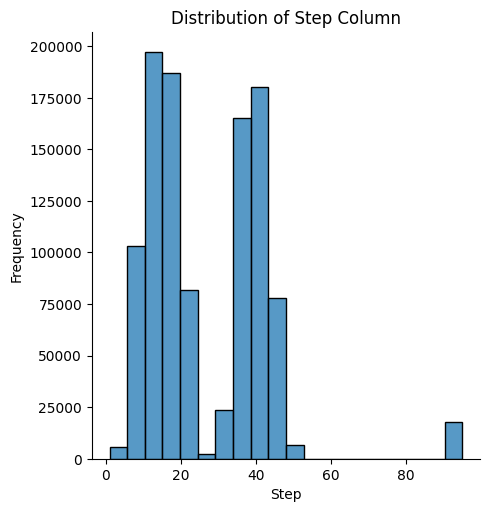

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of step column
sns.displot(data['step'],bins=20)
plt.title("Distribution of Step Column")
plt.xlabel("Step")
plt.ylabel("Frequency")
plt.show()


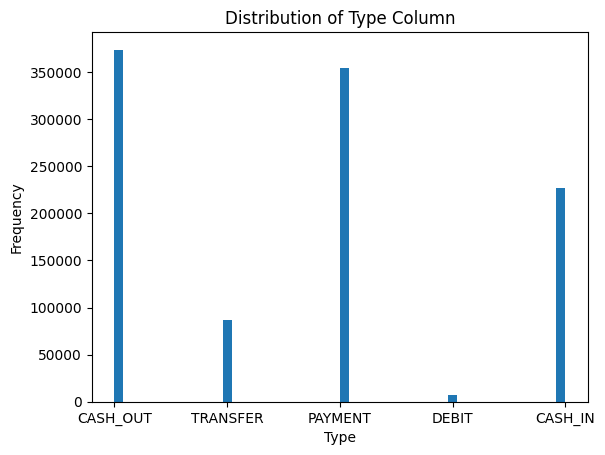

In [38]:
# Plot the distribution of type column
plt.hist(data['type'], bins=50)
plt.title("Distribution of Type Column")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.show()


In [39]:
# Transaction type in pie chart
type = data['type'].value_counts()
transactions = type.index
quities = type.values

import plotly.express as px
figure = px.pie(data, values=quities, names=transactions,hole=0.3,title="Distribution of Transaction types")
figure.show()


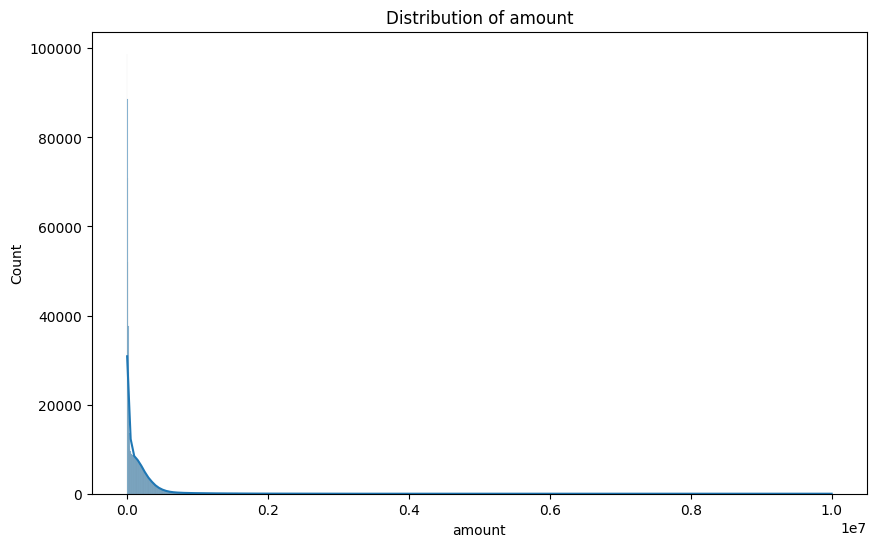

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], kde=True)
plt.title('Distribution of amount')
plt.show()

The distribution is right skrewed

<Axes: xlabel='amount', ylabel='Density'>

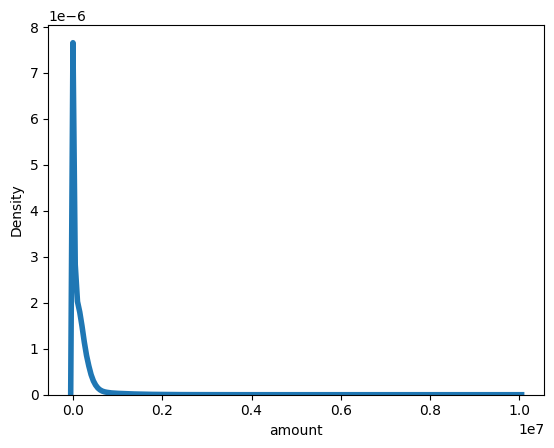

In [41]:
sns.kdeplot(data['amount'], linewidth=4)

The distribution is right skewed

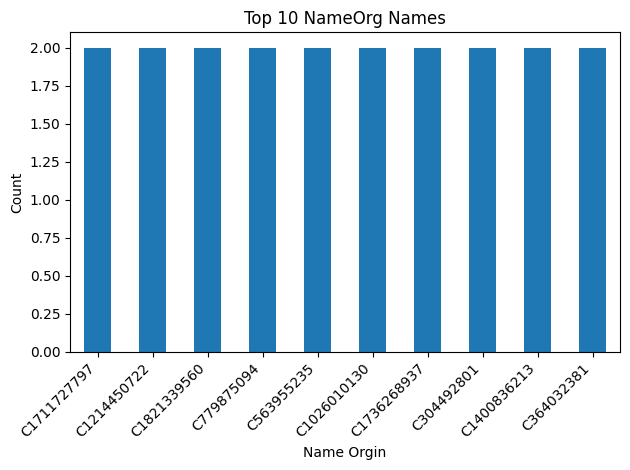

In [42]:
data['nameOrig'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 NameOrg Names')
plt.xlabel('Name Orgin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of transaction amount')

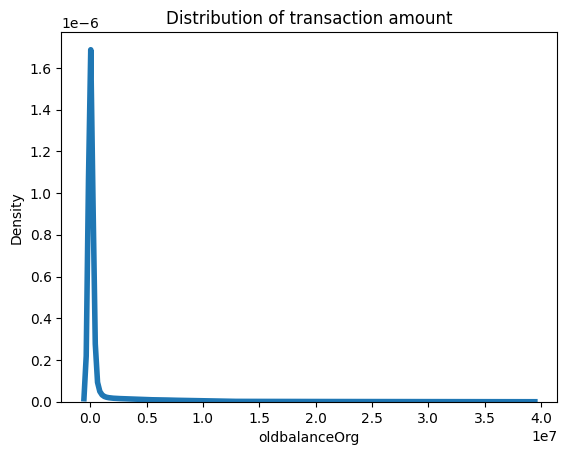

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution is right skewed

Text(0.5, 1.0, 'Distribution of transaction amount')

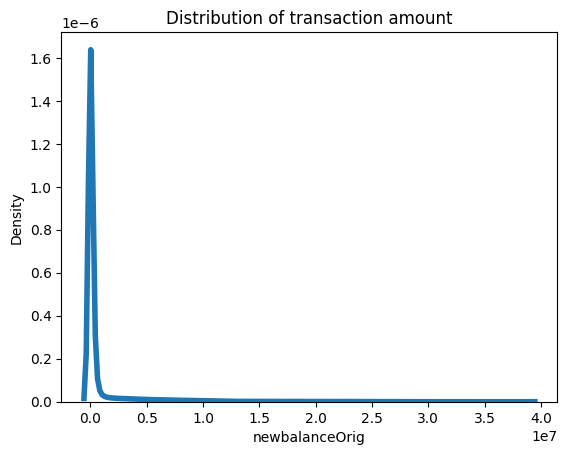

In [44]:
sns.kdeplot(data['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution is right skewed

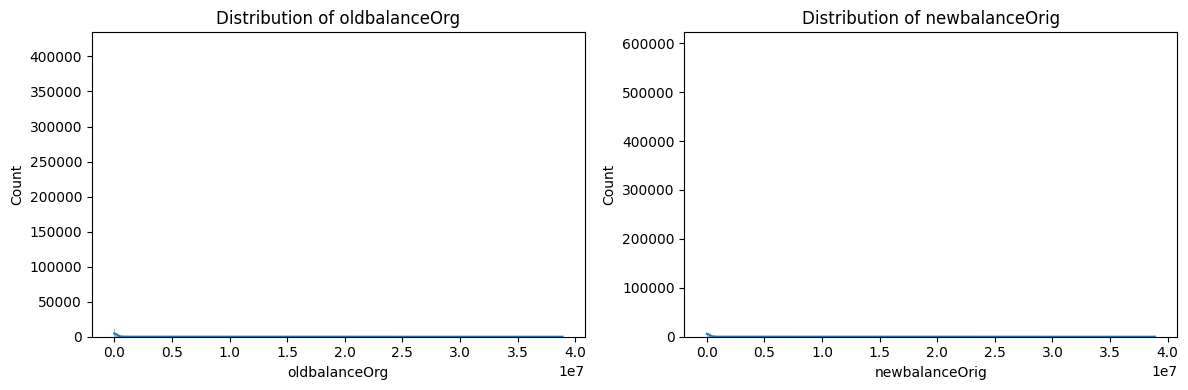

In [45]:
# Historgram representation
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data['oldbalanceOrg'], kde=True)
plt.title('Distribution of oldbalanceOrg')
plt.subplot(1,2,2)
sns.histplot(data['newbalanceOrig'],kde=True)
plt.title('Distribution of newbalanceOrig')
plt.tight_layout()
plt.show()

Both are Right Skewed , where large number of values concentrated near zero and tail extends to higher values

 Most accounts are relatively have low balance a few have higher balance



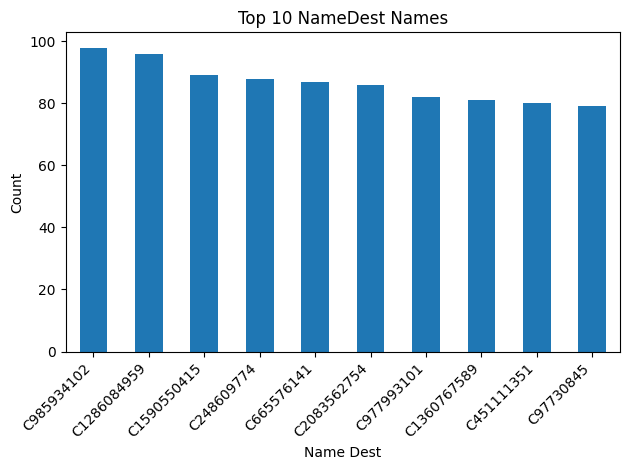

In [46]:
data['nameDest'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 NameDest Names')
plt.xlabel('Name Dest')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of transaction amount')

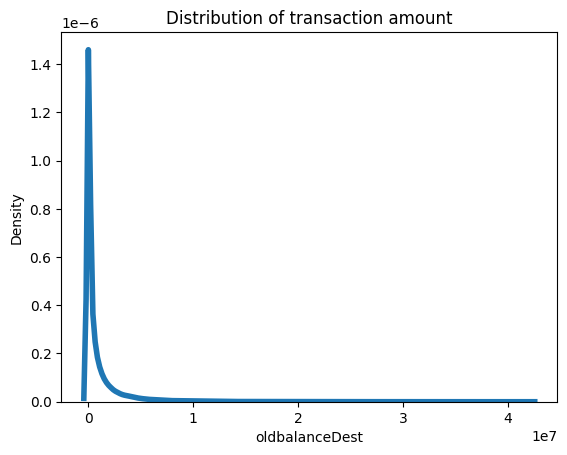

In [47]:
sns.kdeplot(data['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

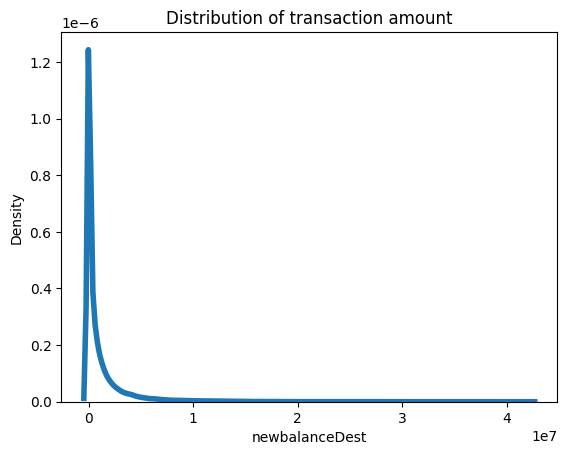

In [48]:
sns.kdeplot(data['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

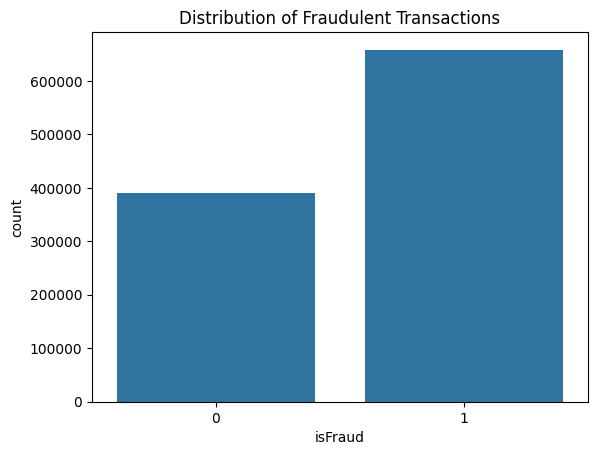

In [49]:
# Plot the distribution of isFraud column
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()


# Bivariate analysis

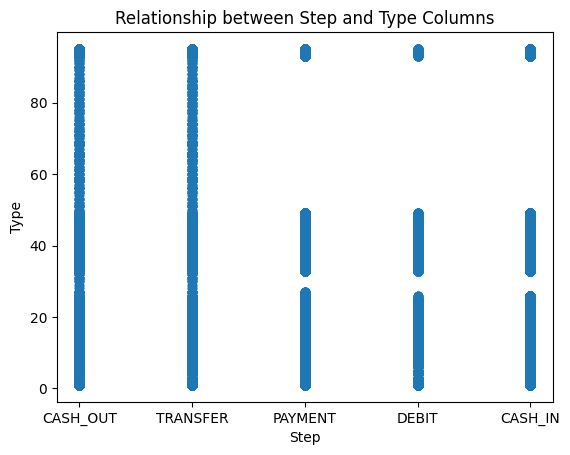

In [50]:
# Plot the relationship between step and type columns
plt.scatter(data['type'], data['step'])
plt.title("Relationship between Step and Type Columns")
plt.xlabel("Step")
plt.ylabel("Type")
plt.show()


Text(0, 0.5, 'Amount')

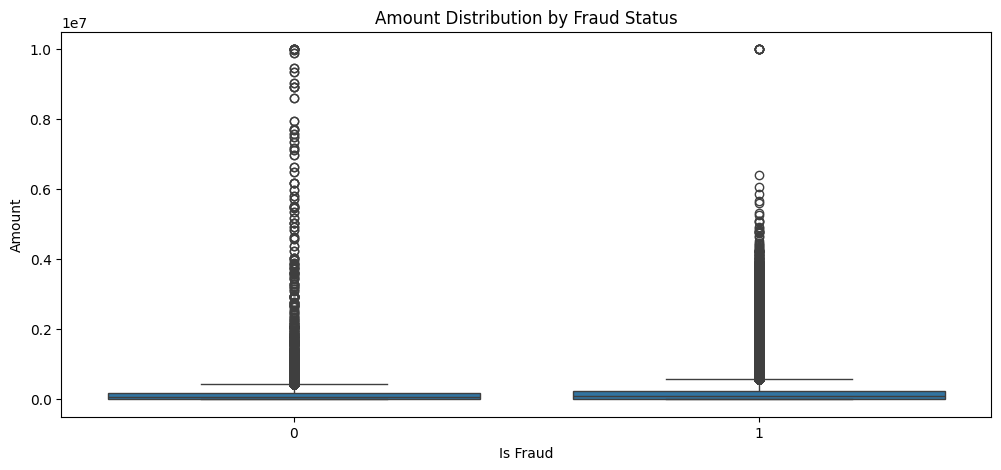

In [51]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

Fraudulent transactions and non-fraudulent transactions tends to be at lower amounts

Outliers indicates that there are a few transactions with significantly higher amounts than the rest

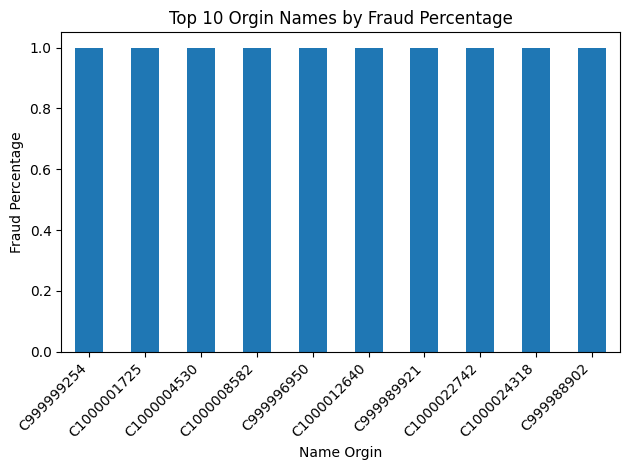

In [52]:
fraudOrg = data.groupby('nameOrig')['isFraud'].mean().sort_values(ascending=False).head(10)
fraudOrg.plot(kind='bar')
plt.title('Top 10 Orgin Names by Fraud Percentage')
plt.xlabel('Name Orgin')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

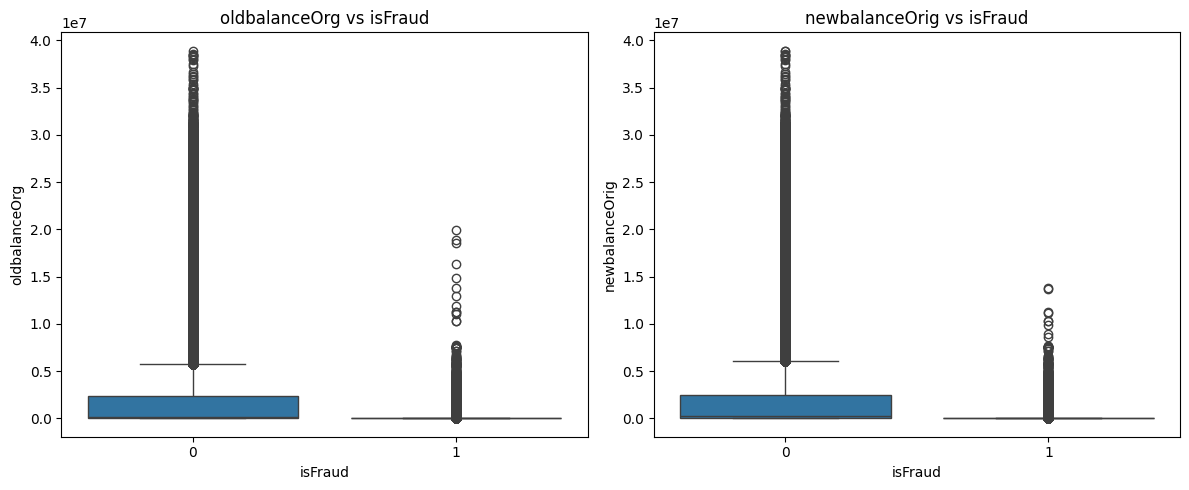

In [53]:
# Bivariate analysis
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=data)
plt.title('oldbalanceOrg vs isFraud')
plt.subplot(1,2,2)
sns.boxplot(x='isFraud', y='newbalanceOrig', data=data)
plt.title('newbalanceOrig vs isFraud')
plt.tight_layout()
plt.show()

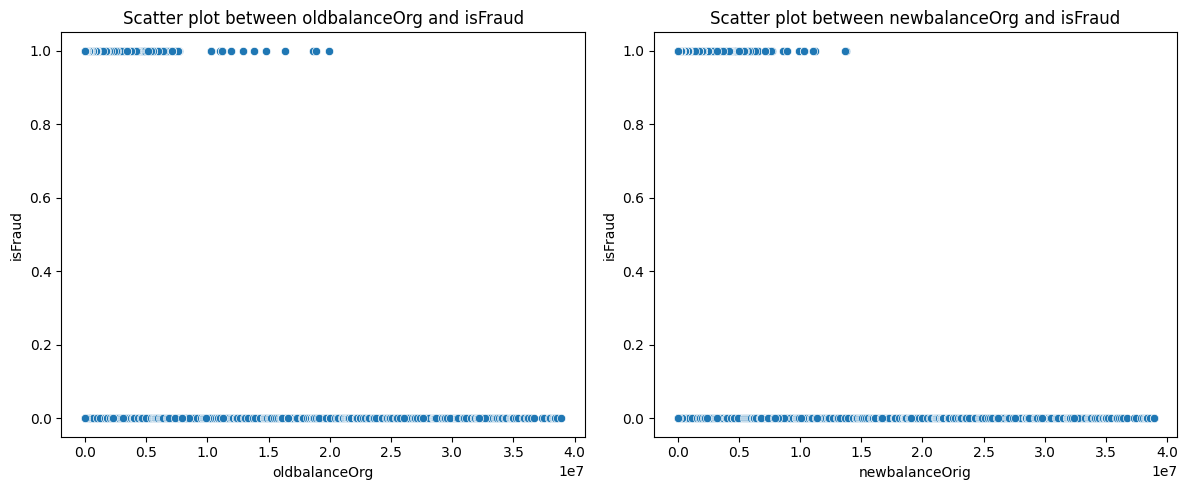

In [54]:


# Scatter plot between oldbalanceOrg and isFraud
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='oldbalanceOrg', y='isFraud', data=data)
plt.title('Scatter plot between oldbalanceOrg and isFraud')
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')

# Scatter plot between newbalanceOrg and isFraud
plt.subplot(1,2,2)
sns.scatterplot(x='newbalanceOrig', y='isFraud', data=data)
plt.title('Scatter plot between newbalanceOrg and isFraud')
plt.xlabel('newbalanceOrig')
plt.ylabel('isFraud')

plt.tight_layout()
plt.show()


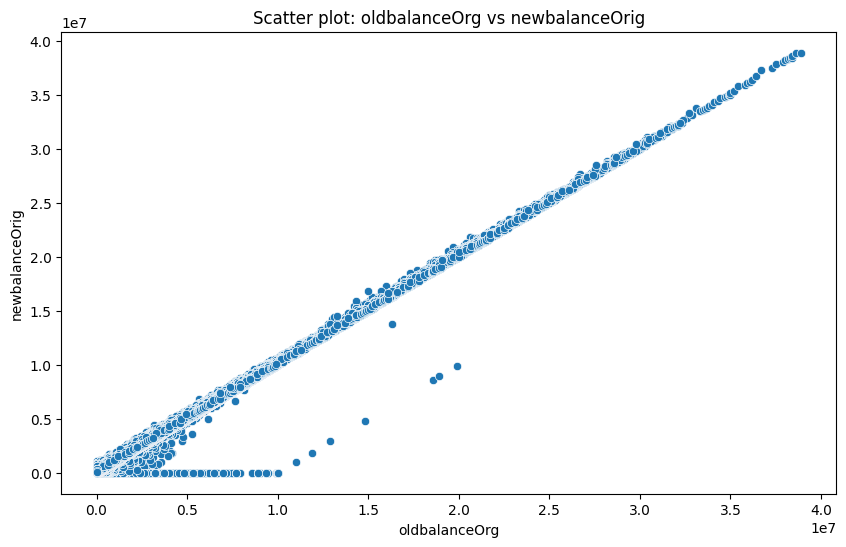

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=data)
plt.title('Scatter plot: oldbalanceOrg vs newbalanceOrig')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.show()

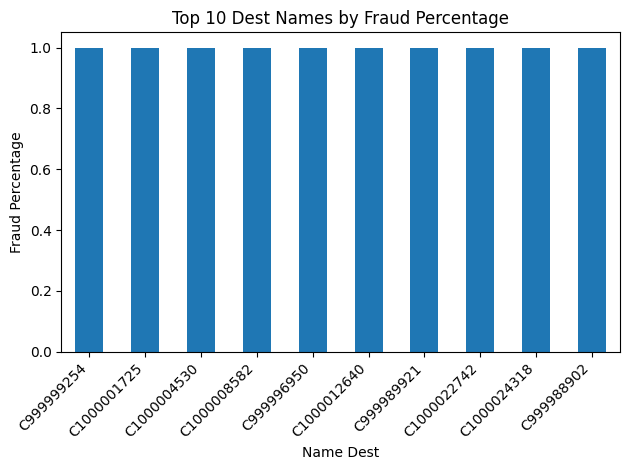

In [56]:
fraudDes = data.groupby('nameDest')['isFraud'].mean().sort_values(ascending=False).head(10)
fraudOrg.plot(kind='bar')
plt.title('Top 10 Dest Names by Fraud Percentage')
plt.xlabel('Name Dest')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

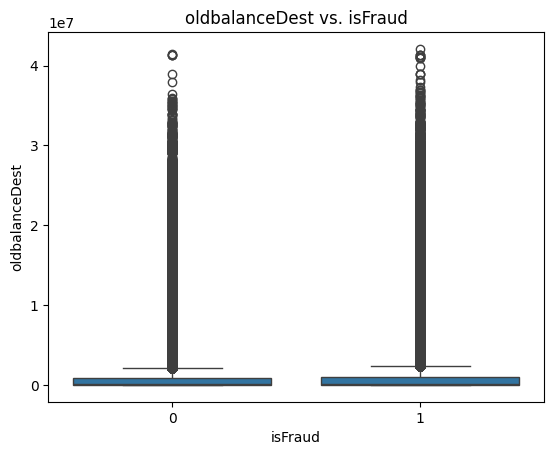

In [57]:
# Create a boxplot of oldbalanceDest vs. isFraud
sns.boxplot(x="isFraud", y="oldbalanceDest", data=data)
plt.title("oldbalanceDest vs. isFraud")
plt.xlabel("isFraud")
plt.ylabel("oldbalanceDest")
plt.show()


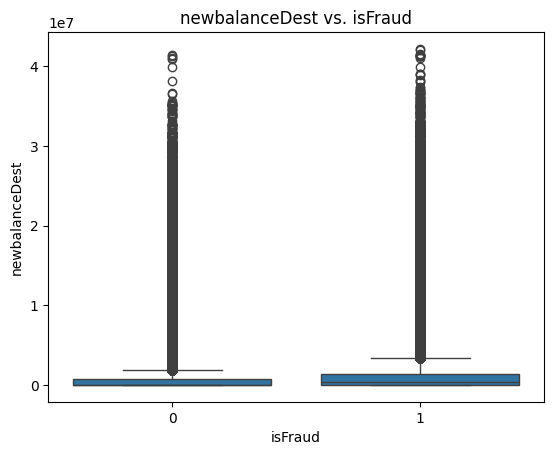

In [58]:
# Create a boxplot of newbalanceDest vs. isFraud
sns.boxplot(x="isFraud", y="newbalanceDest", data=data)
plt.title("newbalanceDest vs. isFraud")
plt.xlabel("isFraud")
plt.ylabel("newbalanceDest")
plt.show()


In [59]:
range = data['oldbalanceOrg'].max() - data['oldbalanceOrg'].min()
print("Range:", range)

variance = data['oldbalanceOrg'].var()
print("Variance:", variance)

std= data['oldbalanceOrg'].std()
print("Standard deviation:", std)

CV = std/ data['oldbalanceOrg'].mean()
print("Coefficient of variation:",CV)


Range: 38900000.0
Variance: 8831316778581.998
Standard deviation: 2971753.1489984156
Coefficient of variation: 3.400131611880724


In [60]:
range = data['newbalanceOrig'].max() - data['newbalanceOrig'].min()
print("Range:", range)

variance = data['newbalanceOrig'].var()
print("Variance:", variance)

std= data['newbalanceOrig'].std()
print("Standard deviation:", std)

CV = std/ data['newbalanceOrig'].mean()
print("Coefficient of variation:",CV)


Range: 38900000.0
Variance: 9049720021357.959
Standard deviation: 3008275.2569134957
Coefficient of variation: 3.3656709580636934


In [61]:
range = data['amount'].max() - data['amount'].min()
print("Range:", range)

variance = data['amount'].var()
print("Variance:", variance)

std= data['amount'].std()
print("Standard deviation:", std)

CV = std/ data['amount'].mean()
print("Coefficient of variation:",CV)


Range: 9999999.9
Variance: 70193696581.6703
Standard deviation: 264940.93036311
Coefficient of variation: 1.6697925291819349


In [62]:
# Correlation coefficient
correlation = data['oldbalanceOrg'].corr(data['newbalanceOrig'])
print(f'Correlation coefficient between oldbalanceOrg and newbalanceOrig: {correlation:.4f}')


Correlation coefficient between oldbalanceOrg and newbalanceOrig: 0.9990


In [63]:
# Correlation coefficient
correlation = data['oldbalanceOrg'].corr(data['isFraud'])
print(f'Correlation coefficient between oldbalanceOrg and isfraud: {correlation:.4f}')


Correlation coefficient between oldbalanceOrg and isfraud: -0.3627


In [64]:
# Correlation coefficient
correlation = data['newbalanceOrig'].corr(data['isFraud'])
print(f'Correlation coefficient between newbalanceOrg and isfraud: {correlation:.4f}')

Correlation coefficient between newbalanceOrg and isfraud: -0.3753


In [65]:
# Correlation coefficient
correlation = data['amount'].corr(data['isFraud'])
print(f'Correlation coefficient between amount and isFraud: {correlation:.4f}')

Correlation coefficient between amount and isFraud: 0.1373


# Multivariate Analysis

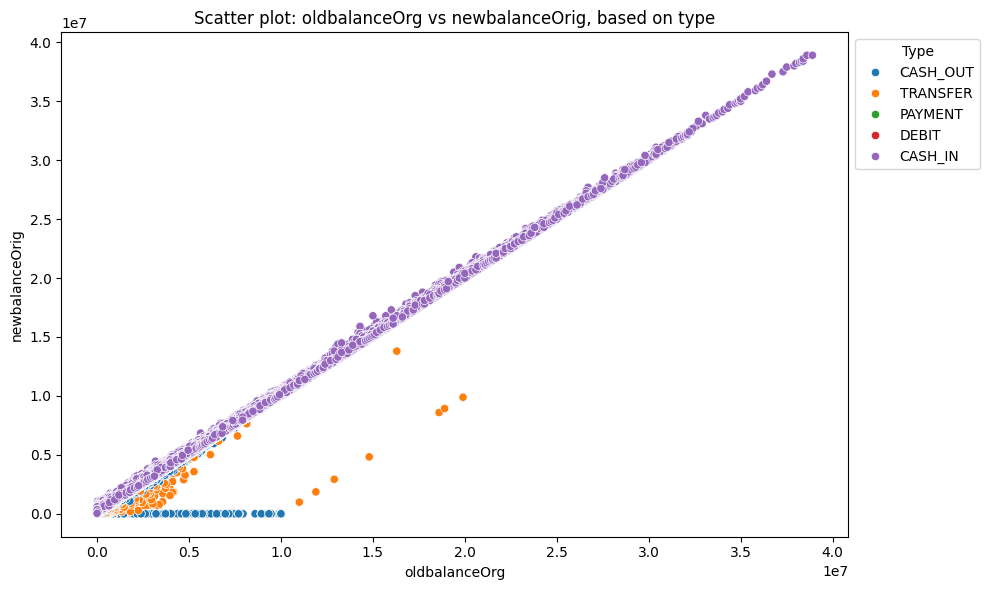

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='type', data=data)
plt.title('Scatter plot: oldbalanceOrg vs newbalanceOrig, based on type')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

Most datapoint are clustered near to orgin

Cash_out and transfer are high value transaction spread among diagonals

Payment are at lower range

Debit are rare in transcations


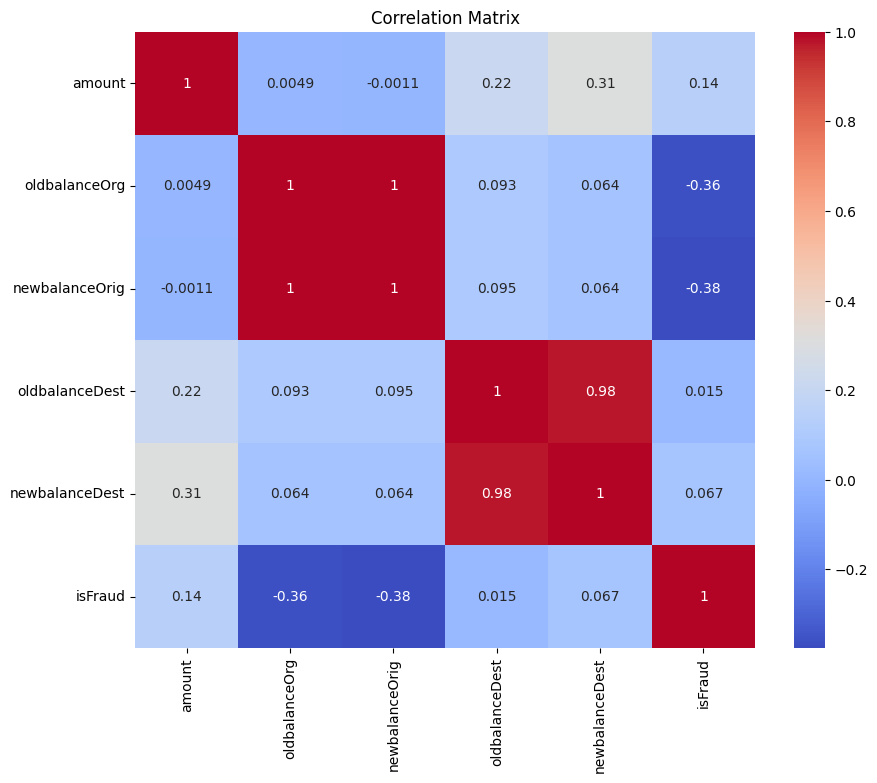

In [67]:
# Correlation matrix
corr_matrix = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

oldbalaceOrg and newbalaceOrg has strong possitive correlation ie. 1

oldbalanceDest and newbalanceDest has possitive correlation ie. 0.98

isFraud and amount has weak correlation ,higher amount tends to be fraud

There is a weak positive correlation between amount and newbalanceDest and a slightly stronger correlation with oldbalanceDest

isFraud has negative correlation with oldbalanceOrg and  newbalanceOrg,so lower balance accounts are less affected by fraud

isFraud has a weak correlation with both oldbalanceDest and newbalanceDest

The remaining correlations are very weak or close to zero,those features have little or no relationship with each other

# Missing Value Handling

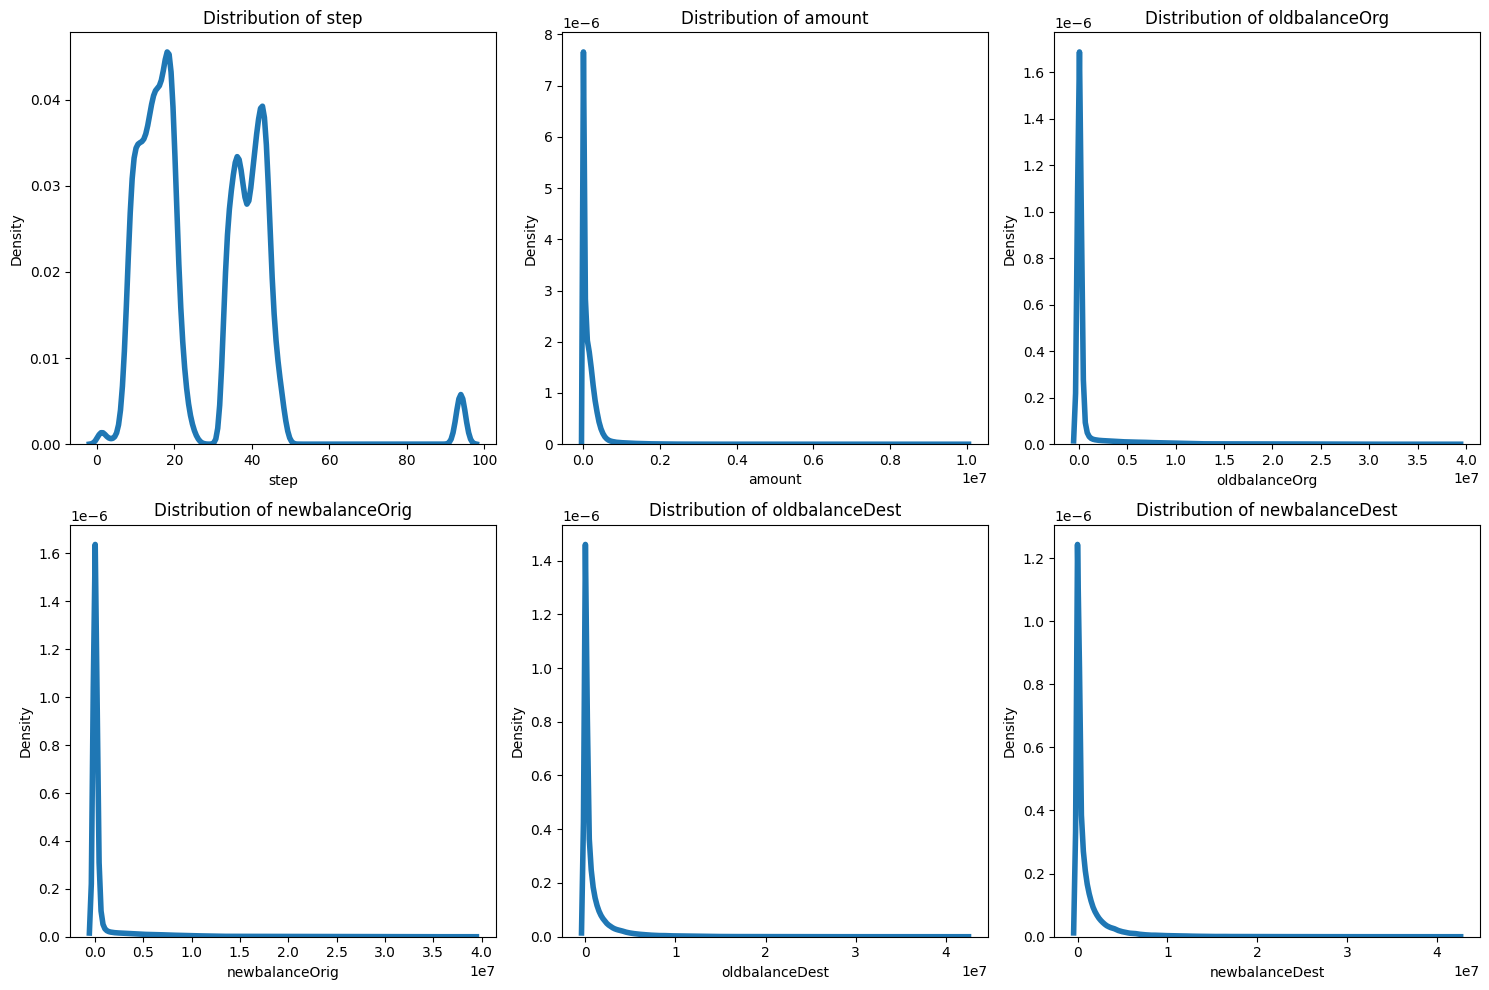

In [68]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):

        sns.kdeplot(data[feature[i]], ax=ax, linewidth=4)
        ax.set_xlabel(feature[i])
        ax.set_title(f"Distribution of {feature[i]}")

plt.tight_layout()
plt.show()

In [69]:
null_mask = data.isnull().any(axis=1)
null_rows = data[null_mask]
print(null_rows)


        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
96594     12  CASH_OUT  135606.03   C322401576           0.00            0.00   
116611    13   PAYMENT    9380.58   C623305774      481987.72       472607.14   
116642    13  CASH_OUT  212336.43   C115676016       56600.00            0.00   
116665    13   PAYMENT    9524.24  C1960787888           0.00             NaN   
116669    13     DEBIT    1523.62   C446213304         812.00             NaN   
116675    13  CASH_OUT   43911.48  C1642605387            NaN            0.00   
288396    19   PAYMENT   16690.75  C1225396235        2035.00             NaN   
424059    36  CASH_OUT  529014.08   C614746610            NaN            0.00   
691071    13   PAYMENT     214.19   C828117169        2877.33         2663.14   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  
96594   C1747713912             NaN       807411.01        1  
116611  M2064922760            0.00             NaN        1  


In [70]:
numeric_columns = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)

data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.0,9291619.62,1
1,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.0,132842.64,1
2,4,TRANSFER,10000000.00,C7162498,12900000.00,2930418.44,C945327594,0.0,0.00,1
3,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.0,184477.77,1
4,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.0,970749.68,1


The numeric distributions are right skewed so we  take median to fill null values

In [71]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

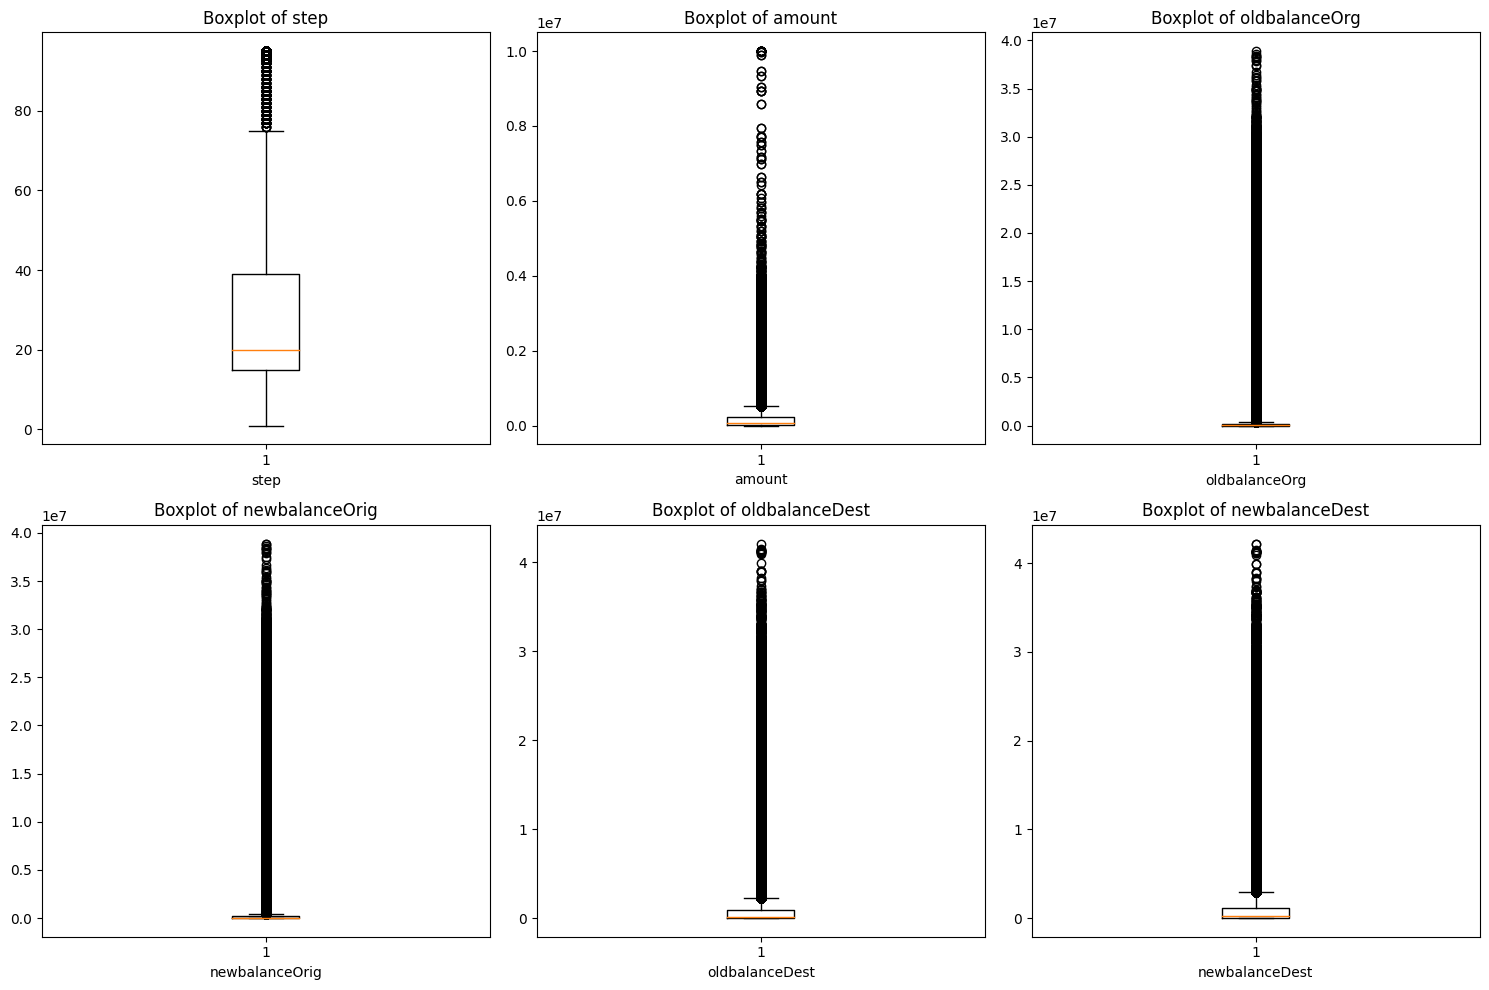

In [72]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(data[feature[i]])
    ax.set_title(f"Boxplot of {feature[i]}")
    ax.set_xlabel(feature[i])

plt.tight_layout()
plt.show()


# Outlier handling using IQR
The data is skewed so IQR method is used

In [73]:
# Function to handle outliers using IQR method
columns_C = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
def handle_outliers(data, columns_C):
    for col in columns_C:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[f'{col}_cleaned'] = np.where(data[col] > upper_bound, upper_bound,
                                       np.where(data[col] < lower_bound, lower_bound, data[col]))
    return data

# Handle outliers in each column of numeric columns
data = handle_outliers(data, columns_C)

# Print summary statistics before and after outlier handling
for col in columns_C:
    print(f'Summary statistics for {col}:')
    print('=====Before:=====')
    print(data[col].describe())
    print('=====After:========')
    print(data[f'{col}_cleaned'].describe())

print('Outlier handling completed.')

Summary statistics for amount:
=====Before:=====
count    1.048575e+06
mean     1.586670e+05
std      2.649409e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      1.000000e+07
Name: amount, dtype: float64
=====After:========
count    1.048575e+06
mean     1.346348e+05
std      1.501760e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      5.161811e+05
Name: amount_cleaned, dtype: float64
Summary statistics for oldbalanceOrg:
=====Before:=====
count    1.048575e+06
mean     8.740096e+05
std      2.971751e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.600200e+04
75%      1.366420e+05
max      3.890000e+07
Name: oldbalanceOrg, dtype: float64
=====After:========
count    1.048575e+06
mean     9.055136e+04
std      1.303831e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.600200e+04
75%      1.366420e+05
max      3.416051e+05
Name: oldbalanceOrg_cleaned, dtype: float64
Summa

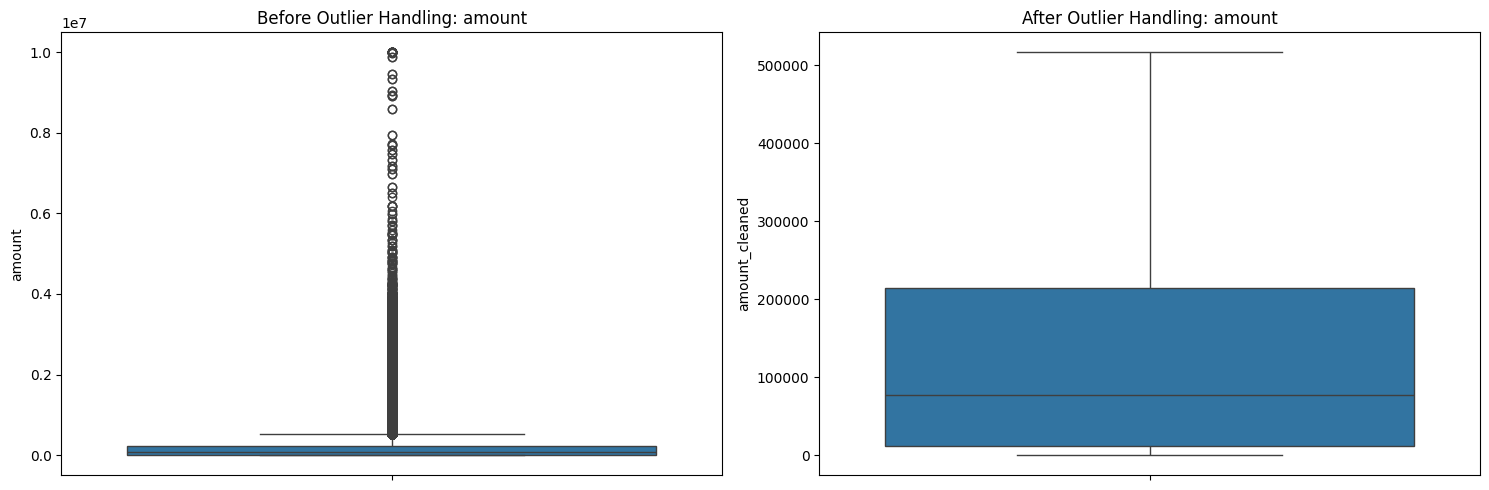

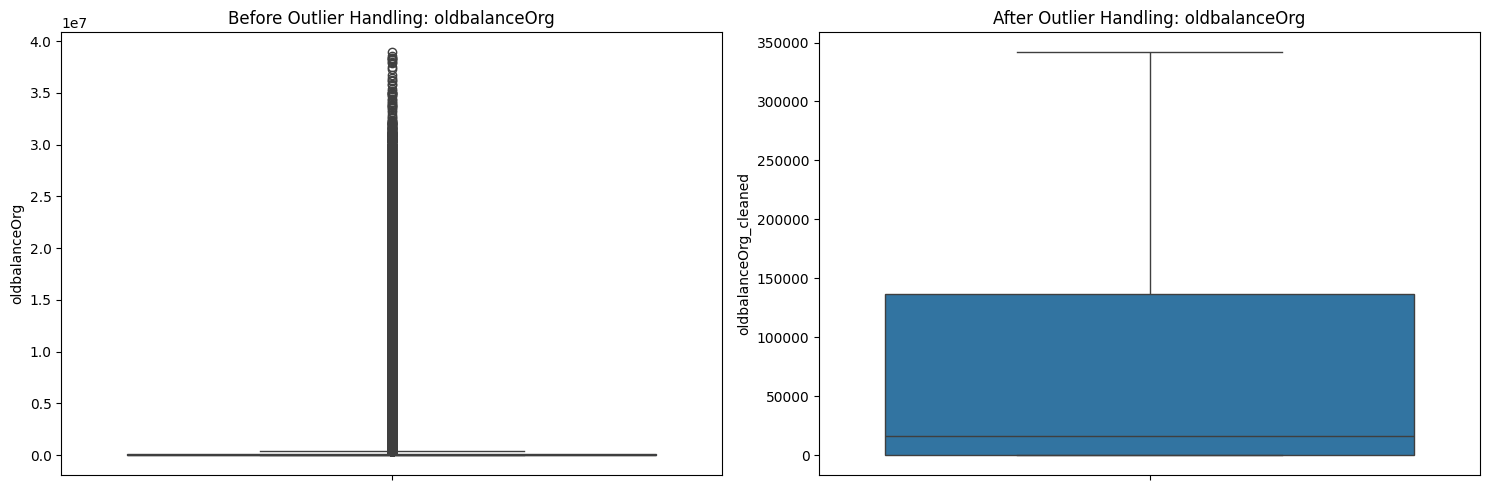

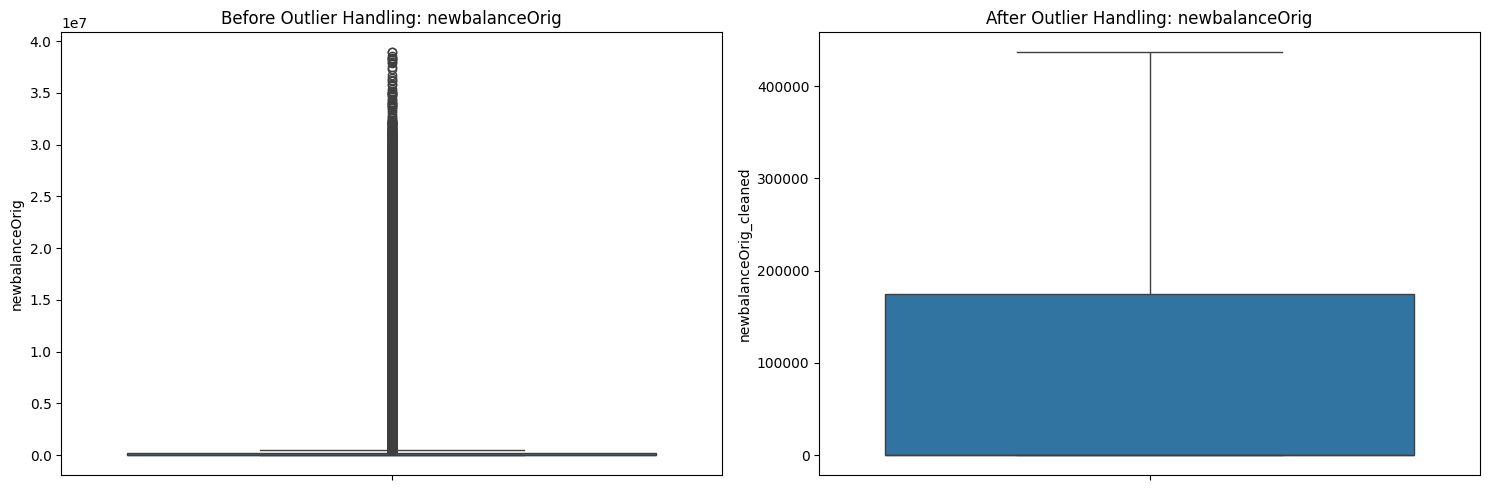

In [74]:
# Plotting function
def plot_before_after(data, col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    sns.boxplot(data[col], ax=ax1)
    ax1.set_title(f'Before Outlier Handling: {col}')

    sns.boxplot(data[f'{col}_cleaned'], ax=ax2)
    ax2.set_title(f'After Outlier Handling: {col}')

    plt.tight_layout()
    plt.show()

# Plot before and after for each column
for col in columns_C:
    plot_before_after(data, col)

# Label Encoding


In [75]:
# Perform label encoding on the 'type' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
# View the mapping of labels to integers
print(le.classes_)
print(le.transform(le.classes_))

#type_encoded column contains the encoded values
print(data.head())

['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
[0 1 2 3 4]
   step  type       amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     1    416001.33   C749981943           0.00            0.00   
1     1     1    132842.64    C13692003        4499.08            0.00   
2     4     4  10000000.00     C7162498    12900000.00      2930418.44   
3     8     1    181728.11  C2102265902           0.00            0.00   
4     8     4   1078013.76  C1026280121           0.00            0.00   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  amount_cleaned  \
0  C667346055           102.0      9291619.62        1     416001.3300   
1  C297927961             0.0       132842.64        1     132842.6400   
2  C945327594             0.0            0.00        1     516181.1275   
3  C789014007         11397.0       184477.77        1     181728.1100   
4  C277510102             0.0       970749.68        1     516181.1275   

   oldbalanceOrg_cleaned  newbalanceOrig_clean

# SMOTE


The data is inbalanced so we use Synthetic Minority Oversampling Technique (SMOTE). SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Prepare features and target variable
features = ['type', 'amount_cleaned', 'oldbalanceOrg_cleaned', 'newbalanceOrig_cleaned']
X = data[features]
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\\nOriginal dataset shape:", X.shape)
print("Resampled dataset shape:", X_resampled.shape)

print("\\nOriginal class distribution:")
print(y.value_counts(normalize=True))

print("\\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))



\nOriginal dataset shape: (1048575, 4)
Resampled dataset shape: (921654, 4)
\nOriginal class distribution:
isFraud
1    0.627828
0    0.372172
Name: proportion, dtype: float64
\nResampled class distribution:
isFraud
1    0.5
0    0.5
Name: proportion, dtype: float64


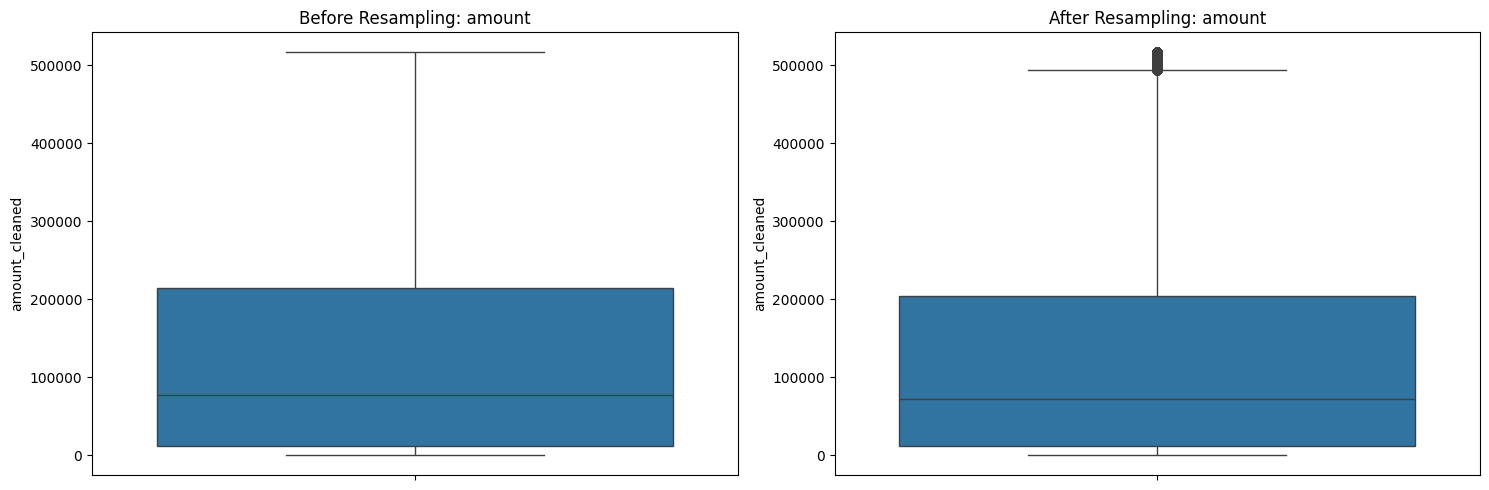

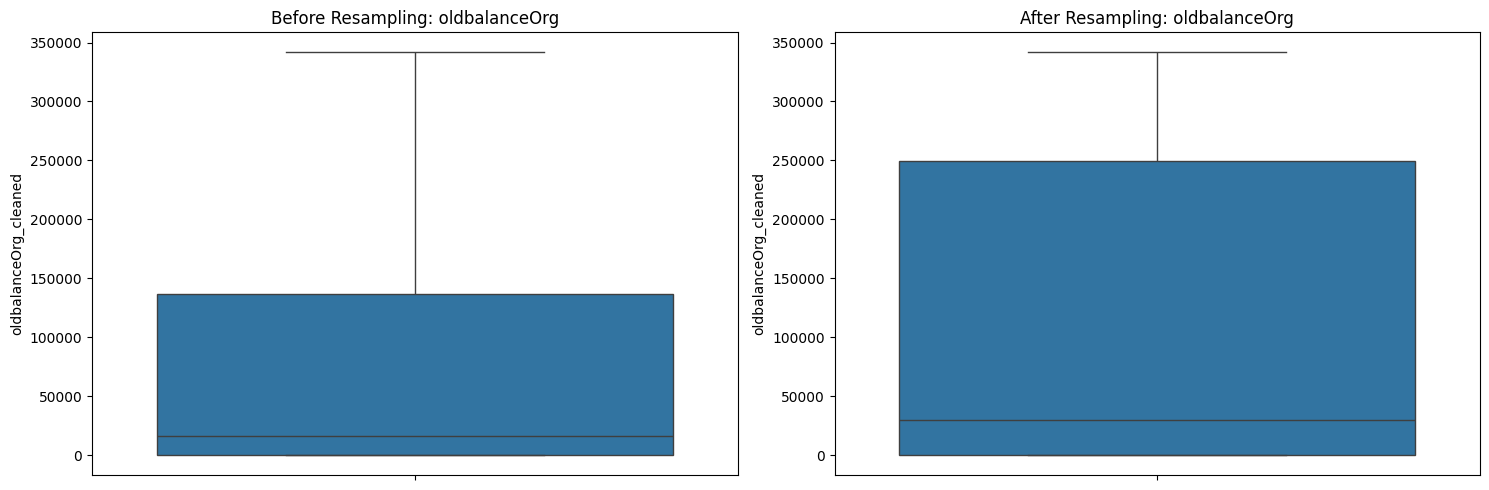

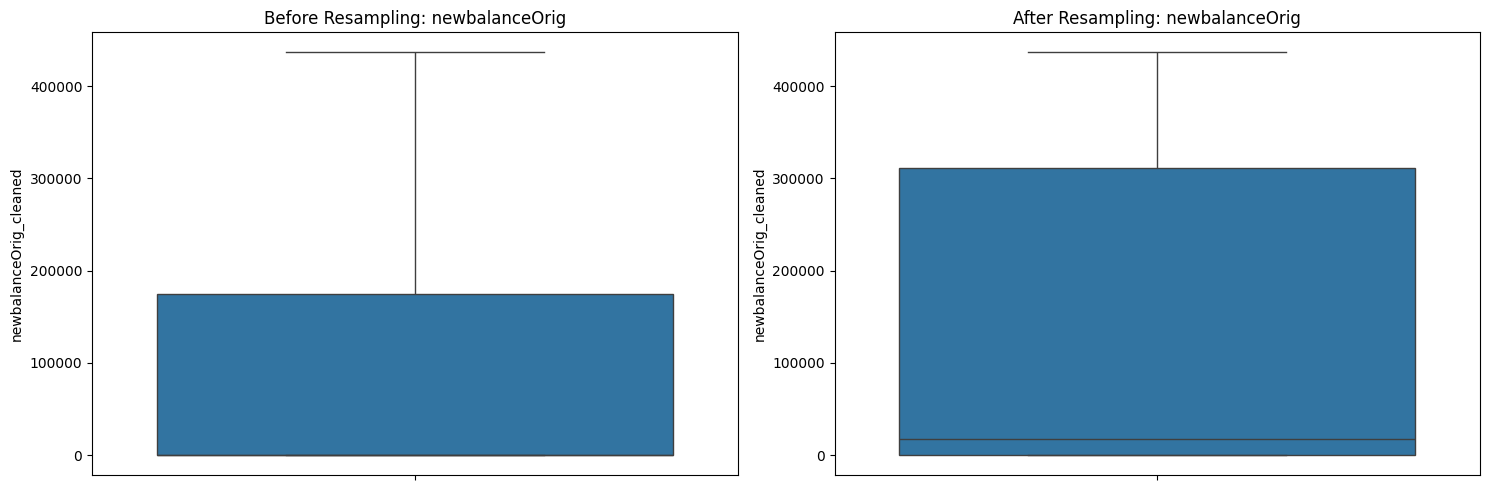

In [77]:
# Before and After Resampling

def plot_before_after(data, col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    sns.boxplot(data[f'{col}_cleaned'], ax=ax1)
    ax1.set_title(f'Before Resampling: {col}')

    sns.boxplot(X_resampled[f'{col}_cleaned'], ax=ax2)
    ax2.set_title(f'After Resampling: {col}')

    plt.tight_layout()
    plt.show()

# Plot before and after for each column
for col in columns_C:
    plot_before_after(data, col)

# StandardScaler

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


# Model Selection


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
# Define models

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()

}

# Train and evaluate models
results = {}

for name, model in models.items():
    print('Training ' + name + '...')
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print('\Model Performance:')
print(results_df)

# Find the best model based on F1 Score
best_model = results_df['F1 Score'].idxmax()
print('\Best performing model based on F1 Score: ' + best_model)

Training Decision Tree...
Training Random Forest...
Training KNN...
\Model Performance:
               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.917456   0.937894  0.930116  0.933989
Random Forest  0.928710   0.962424  0.922465  0.942021
KNN            0.929489   0.967859  0.918181  0.942366
\Best performing model based on F1 Score: KNN


KNN is the best model but  data is skewed ,So we need to use data robust to skewness so choose Random Forest

# Hyperparameter Turning

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
Best cross-validation score: 0.9480868091496375

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    117075
           1       0.99      0.91      0.95    197498

    accuracy                           0.94    314573
   macro avg       0.93      0.95      0.93    314573
weighted avg       0.94      0.94      0.94    314573


Confusion Matrix:
[[115020   2055]
 [ 17839 179659]]


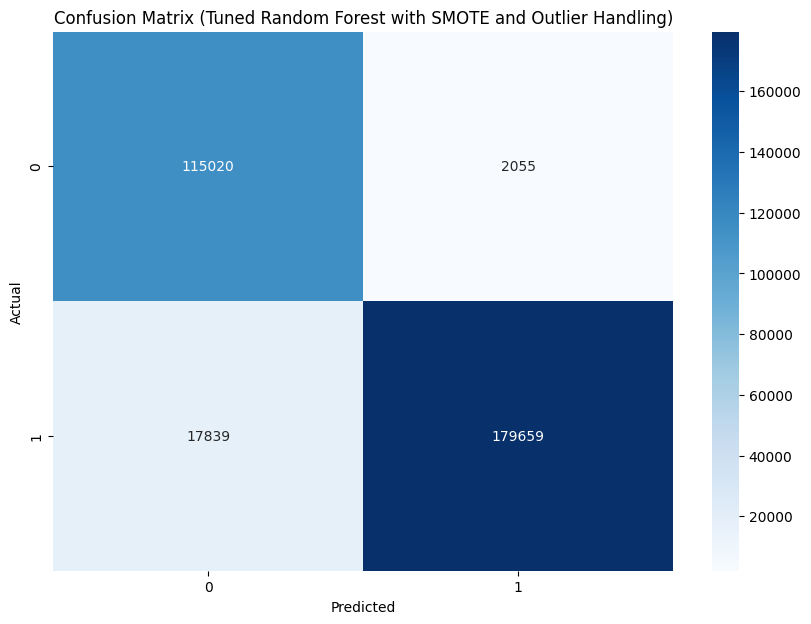

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train_scaled, y_resampled)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best model to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest with SMOTE and Outlier Handling)')
plt.show()

# Prediction



In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_resampled, test_size=0.2, random_state=42)
# Create a Random Forest model with the best parameters
rf_model = RandomForestClassifier(n_estimators=200,
                                  min_samples_split=2,
                                  min_samples_leaf=4,
                                  max_features='auto',
                                  max_depth=20,
                                  random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = rf_model.predict(X_test)
print("Model accuracy:", rf_model.score(X_test, y_test))

Model accuracy: 0.9484026018412529


In [87]:
#features = np.array([[4,9000.60,9000.60,0.0]])
#features = np.array([[3,9839.64,170136.0,160296.36]])

features = np.array([[4,10000000.00,12900000.00,2930418.44]])
#features = np.array([[0,228451,143236,371688]])

print(rf_model.predict(features))

[1]


In [88]:
prediction = rf_model.predict(features)[0]

if prediction == 1:
    result = "The Transcation is Fraud."
else:
    result = "The Transaction is Not Fraud"

print(result)

The Transcation is Fraud.
